 <h1> Projeto: Análise de Fatores que Influenciam os Preços de Imóveis <br>
 <small>House Prices - São Paulo</small></h1>

<h2>1. Introdução</h2>
<h3>Objetivo</h3>
    <p>
      O projeto visa identificar e analisar os fatores que influenciam os preços dos imóveis em São Paulo, utilizando o dataset “House Prices - São Paulo” do Kaggle. A ideia é aplicar técnicas de pré-processamento, análise exploratória, modelagem e avaliação para construir um modelo preditivo e entender quais variáveis são determinantes para o valor dos imóveis.
    </p>
    <h3>Justificativa</h3>
    <ul>
      <li><strong>Relevância do Tema:</strong> O mercado imobiliário é fundamental para a economia e entender suas variáveis pode auxiliar tanto investidores quanto compradores.</li>
      <li><strong>Dataset Real:</strong> Utilizar dados reais do mercado de São Paulo reforça tanto a aplicabilidade dos métodos aprendidos quanto a experiência com dados do mundo real.</li>
    </ul>
  </section>


<h2>2. Pré-processamento e Limpeza dos Dados</h2>


In [10]:
# Importação das bibliotecas para o nosso jogo de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para modelagem e validação
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregando o dataset "House Prices - São Paulo" do Kaggle
df = pd.read_csv('housing_sp_city.csv', encoding='latin1')
print("Modelo dos dados:")
print(df.head())


Modelo dos dados:
           logradouro numero                        bairro        cep  \
0  Rua Juvenal Galeno     53              Jardim da SaÃºde  4290030.0   
1         Rua Juruaba     16  Vila Santa Teresa (Zona Sul)  4187320.0   
2    Avenida Paulista    402                    Bela Vista  1311000.0   
3        Rua Alvorada   1190                 Vila OlÃ­mpia  4550004.0   
4        Rua Curitiba    380                      ParaÃ­so  4005030.0   

       cidade           tipo_imovel  area_util  banheiros  suites  quartos  \
0  SÃ£o Paulo  Casa de dois andares      388.0        3.0     1.0      4.0   
1  SÃ£o Paulo                  Casa      129.0        2.0     1.0      3.0   
2  SÃ£o Paulo             Comercial      396.0        4.0     0.0      0.0   
3  SÃ£o Paulo           Apartamento       80.0        2.0     1.0      3.0   
4  SÃ£o Paulo           Apartamento     3322.0        5.0     4.0      4.0   

   vagas_garagem anuncio_criado tipo_anuncio  preco_venda  taxa_condominio

                cep     area_util      banheiros         suites  \
count  1.280560e+05  1.308680e+05  133051.000000  120347.000000   
mean   3.550899e+06  2.244307e+02       2.375683       1.106534   
std    2.177019e+06  5.764345e+03       2.146044       1.218938   
min    0.000000e+00  1.000000e+00       0.000000       0.000000   
25%    2.312135e+06  6.200000e+01       1.000000       0.000000   
50%    3.413030e+06  1.080000e+02       2.000000       1.000000   
75%    4.576050e+06  2.000000e+02       3.000000       2.000000   
max    9.981030e+07  2.025000e+06     200.000000      80.000000   

             quartos  vagas_garagem   preco_venda  taxa_condominio  \
count  130945.000000  129539.000000  1.339640e+05     1.171270e+05   
mean        2.327023       2.443187  6.637484e+05     1.507679e+03   
std         2.140123       5.251624  1.317732e+06     7.795406e+04   
min         0.000000       0.000000  7.000000e+01     0.000000e+00   
25%         2.000000       1.000000  1.750000e

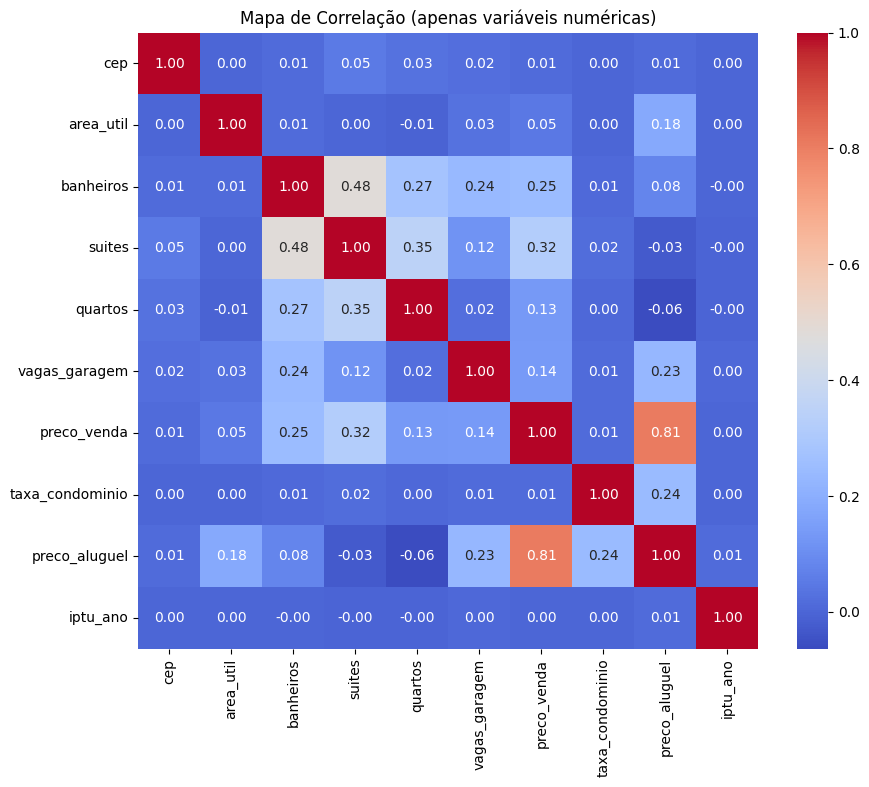

In [14]:
print(df.describe())

# Filtra apenas as colunas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Calcula a correlação entre colunas numéricas
corr = df_numeric.corr()

# Plota o heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Correlação (apenas variáveis numéricas)')
plt.show()


In [15]:
# Tratamento de dados faltantes
# Removendo linhas que estejam com muitos NaNs
df = df.dropna(axis=0)

# Selecionando as colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Colunas numéricas:", numeric_cols)

# Definindo as features (todos os dados menos o preço) e a variável alvo 'preco_venda'
features = [col for col in numeric_cols if col != 'preco_venda']
X = df[features]
y = df['preco_venda']


Colunas numéricas: ['cep', 'area_util', 'banheiros', 'suites', 'quartos', 'vagas_garagem', 'preco_venda', 'taxa_condominio', 'preco_aluguel', 'iptu_ano']


<h3>Passos Realizados</h3>
    <ul>
      <li><strong>Carregamento dos Dados:</strong> O dataset foi carregado utilizando a biblioteca <code>Pandas</code>, possibilitando a visualização das primeiras linhas e a identificação da estrutura dos dados.</li>
      <li><strong>Tratamento de Dados Faltantes:</strong> Foram removidas as linhas com muitos valores ausentes (<code>df.dropna(axis=0)</code>) para evitar inconsistências nas análises. Essa escolha foi feita considerando que o dataset possui um tamanho suficientemente grande, garantindo a integridade dos dados.</li>
      <li><strong>Seleção de Variáveis:</strong> Inicialmente, foi realizado um filtro para selecionar apenas as colunas numéricas (usando <code>df.select_dtypes(include=[np.number])</code>), pois a análise de correlação e muitos modelos requerem variáveis numéricas. Variáveis categóricas, como endereços, foram excluídas para evitar erros na conversão.</li>
    </ul>
    <div class="justificativa">
      <p><strong>Justificativa:</strong> Manter um conjunto de dados limpo e coerente é essencial para obter resultados confiáveis. Remover dados faltantes e focar em variáveis numéricas facilita uma análise direta e evita ruídos que comprometam a interpretação dos modelos.</p>
    </div>

<h2>3. Divisão dos Dados em Treino e Teste</h2>

In [22]:
# Dividindo os dados: 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Tamanho do dataset de treino:", X_train.shape)
print("Tamanho do dataset de teste:", X_test.shape)

Tamanho do dataset de treino: (13269, 9)
Tamanho do dataset de teste: (3318, 9)


<ul>
      <li><strong>Passo Realizado:</strong> Utilizou-se a função <code>train_test_split</code> do scikit-learn para dividir os dados em 80% para treinamento e 20% para teste.</li>
    </ul>
    <div class="justificativa">
      <p><strong>Justificativa:</strong> Dividir os dados permite avaliar o desempenho do modelo em dados não vistos, prevenindo overfitting e garantindo que os resultados obtidos durante a modelagem tenham capacidade de generalização.</p>
    </div>

<h2>4. Modelagem Preditiva</h2>

   <h3>4.1 Regressão Linear (Modelo Base)</h3>

In [17]:
# Instanciando e treinando o modelo de Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("Modelo de Regressão Linear treinado com sucesso!")

Modelo de Regressão Linear treinado com sucesso!


Regressão Linear - MSE: 9444150080.279642
Regressão Linear - RMSE: 97181.0170778205
Regressão Linear - R²: 0.04509845778334043


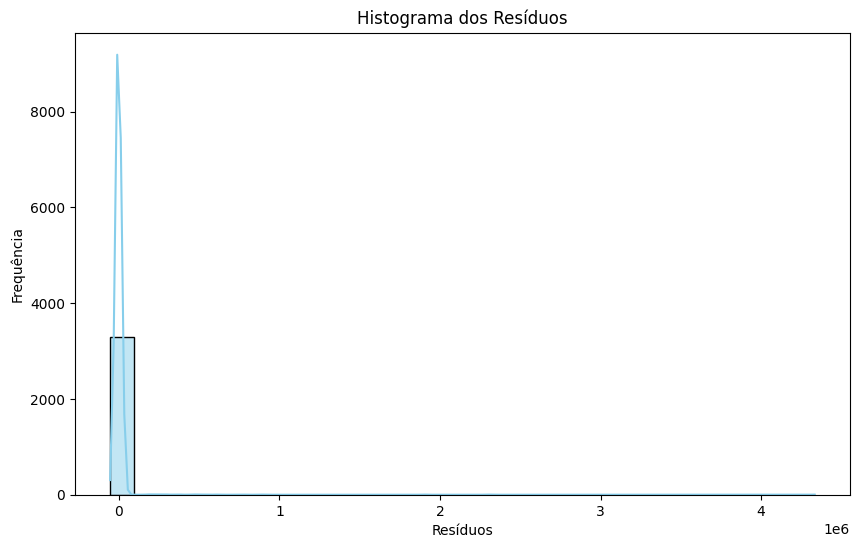

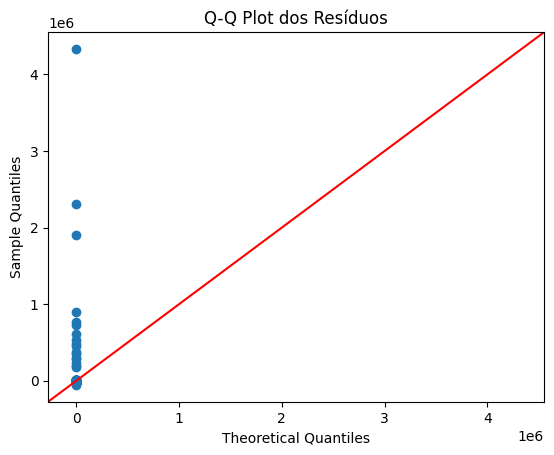

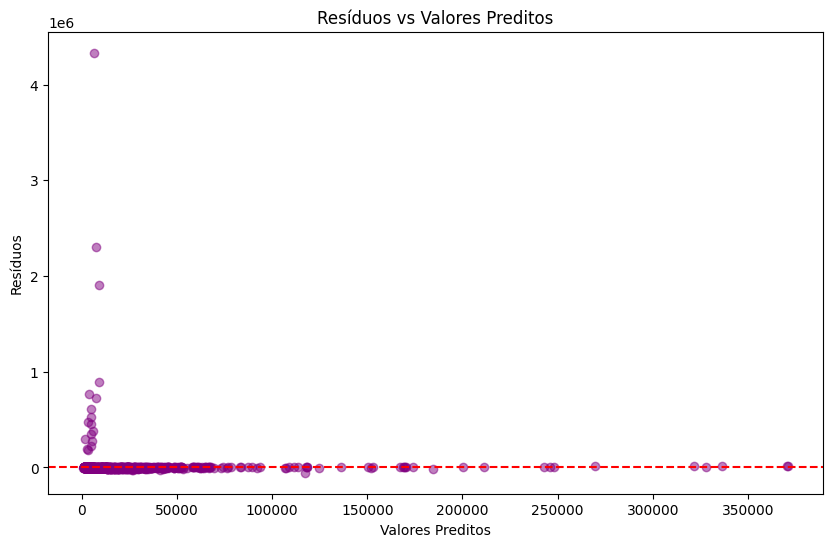

In [18]:
# Realizando as predições no conjunto de teste
y_pred = lr_model.predict(X_test)

# Calculando métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Regressão Linear - MSE:", mse)
print("Regressão Linear - RMSE:", rmse)
print("Regressão Linear - R²:", r2)

# Analisando os resíduos
residuals = y_test - y_pred

# Histograma dos resíduos para ver a distribuição dos erros
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# Q-Q Plot para checar a normalidade dos resíduos
import statsmodels.api as sm
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot dos Resíduos')
plt.show()

# Gráfico de resíduos vs. valores preditos para identificar possíveis padrões
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Preditos')
plt.show()


In [19]:
# Configurando K-Fold Cross-Validation com 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr_model, X, y, cv=kf, scoring='r2')
print("Validação Cruzada (Regressão Linear) - R² por fold:", cv_scores)
print("Média do R²:", np.mean(cv_scores))


Validação Cruzada (Regressão Linear) - R² por fold: [0.04509846 0.31376337 0.09245753 0.08296928 0.36670478]
Média do R²: 0.18019868176811743


 <ul>
      <li><strong>Implementação:</strong> Utilizando o <code>LinearRegression</code> do scikit-learn, o modelo foi treinado com as features disponíveis.</li>
      <li><strong>Resultados:</strong>
        <ul>
          <li>MSE: 9.444.150.080,28</li>
          <li>RMSE: 97.181,02</li>
          <li>R²: 0,045 (no conjunto de teste)</li>
          <li>Validação Cruzada: Média de R² ~ 0,18</li>
        </ul>
      </li>
    </ul>
  <div class="justificativa">
      <p><strong>Justificativa:</strong> A regressão linear foi escolhida como modelo base para estabelecer um benchmark. Apesar de sua simplicidade, os resultados indicaram que as relações entre as variáveis e o preço são provavelmente não lineares, pois o modelo linear explicou muito pouco da variabilidade dos preços.</p>
      <p>Os gráficos indicam que a regressão linear simples não está modelando bem o problema, possivelmente devido a outliers, relações não lineares ou heterocedasticidade (variância dos resíduos não constante). Isso se traduz em resíduos muito grandes para alguns imóveis e na falta de normalidade da distribuição dos erros, o que viola pressupostos importantes da regressão linear clássica.</p>
    </div>

<h3>4.2 Random Forest</h3>

In [20]:
# Treinando o modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predições e avaliação do Random Forest
y_rf_pred = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_rf_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_rf_pred)
print("Random Forest - MSE:", mse_rf)
print("Random Forest - RMSE:", rmse_rf)
print("Random Forest - R²:", r2_rf)

# Validação cruzada para Random Forest
cv_scores_rf = cross_val_score(rf_model, X, y, cv=kf, scoring='r2')
print("Random Forest - Cross Validation R² por fold:", cv_scores_rf)
print("Random Forest - Média do R²:", np.mean(cv_scores_rf))


Random Forest - MSE: 2338445976.9020963
Random Forest - RMSE: 48357.481085165055
Random Forest - R²: 0.7635588538139754
Random Forest - Cross Validation R² por fold: [0.73391    0.79063571 0.8597245  0.88573995 0.96048168]
Random Forest - Média do R²: 0.8460983669653597


  <ul>
      <li><strong>Implementação:</strong> Foi utilizado o <code>RandomForestRegressor</code>, que constrói múltiplas árvores de decisão para capturar relações não lineares e interações entre as variáveis.</li>
       <li><strong>Resultados:</strong>
        <ul>
          <li>MSE: 2.338.445.976,90</li>
          <li>RMSE: 48.357,48</li>
          <li>R²: 0,7636 (no conjunto de teste)</li>
          <li>Validação Cruzada: Média de R² ~ 0,85</li>
        </ul>
      </li>
    </ul>
    <div class="justificativa">
      <p><strong>Justificativa:</strong> O Random Forest demonstrou sua capacidade de modelar relações complexas sem a necessidade de transformações extensas nas features, sendo robusto a overfitting e adequado para datasets com muitas variáveis.</p>
    </div>

  <h3>4.3 Gradient Boosting</h3>

In [21]:
# Treinando o modelo Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predições e avaliação do Gradient Boosting
y_gb_pred = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_gb_pred)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_gb_pred)
print("Gradient Boosting - MSE:", mse_gb)
print("Gradient Boosting - RMSE:", rmse_gb)
print("Gradient Boosting - R²:", r2_gb)

# Validação cruzada para Gradient Boosting
cv_scores_gb = cross_val_score(gb_model, X, y, cv=kf, scoring='r2')
print("Gradient Boosting - Cross Validation R² por fold:", cv_scores_gb)
print("Gradient Boosting - Média do R²:", np.mean(cv_scores_gb))


Gradient Boosting - MSE: 1941263775.7666152
Gradient Boosting - RMSE: 44059.77503082165
Gradient Boosting - R²: 0.803718094527148
Gradient Boosting - Cross Validation R² por fold: [0.80409994 0.86791968 0.82893663 0.88482355 0.95827112]
Gradient Boosting - Média do R²: 0.8688101842142982


 <ul>
      <li><strong>Implementação:</strong> Aplicou-se o <code>GradientBoostingRegressor</code>, que constrói modelos de forma sequencial, corrigindo os erros dos modelos anteriores e melhorando a performance.</li>
      <li><strong>Resultados:</strong>
        <ul>
          <li>MSE: 1.941.263.775,77</li>
          <li>RMSE: 44.059,78</li>
          <li>R²: 0,8037 (no conjunto de teste)</li>
          <li>Validação Cruzada: Média de R² ~ 0,87</li>
        </ul>
      </li>
    </ul>
    <div class="justificativa">
      <p><strong>Justificativa:</strong> O Gradient Boosting demonstrou ser o modelo com melhor desempenho, superando tanto o Random Forest quanto a regressão linear, capturando com maior precisão as interações entre as variáveis.</p>
    </div>
  </section>


  <section>
    <h2>5. Avaliação dos Modelos e Análise dos Resultados</h2>
    <h3>Métricas Utilizadas</h3>
    <ul>
      <li><strong>MSE (Mean Squared Error):</strong> Mede o erro médio ao quadrado entre os valores reais e preditos. Valores menores indicam melhor performance.</li>
      <li><strong>RMSE (Root Mean Squared Error):</strong> Raiz quadrada do MSE, trazendo o erro para a mesma unidade dos preços, facilitando a interpretação.</li>
      <li><strong>R² (Coeficiente de Determinação):</strong> Indica a proporção da variância dos preços explicada pelo modelo. Valores mais próximos de 1 indicam melhor ajuste.</li>
    </ul>
        <h3>Interpretação dos Resultados</h3>
    <ul>
      <li><strong>Regressão Linear:</strong> Com R² muito baixo, o modelo não capturou a complexidade do problema, sugerindo a necessidade de métodos mais sofisticados.</li>
      <li><strong>Random Forest:</strong> Explicou aproximadamente 76% a 85% da variância dos preços, demonstrando robustez na modelagem de relações não lineares.</li>
      <li><strong>Gradient Boosting:</strong> Com os melhores resultados (R² de ~0,80 no teste e ~0,87 na validação), este modelo se destacou como o mais eficaz.</li>
    </ul>
  </section>


  <section>
    <h2>6. Conclusão e Recomendações Finais</h2>
    <h3>Conclusão Geral</h3>
    <p>
      O projeto demonstrou, de forma prática e metodológica, como analisar e prever os preços de imóveis em São Paulo. A abordagem iniciou com a limpeza e preparação dos dados, seguida pela divisão em conjuntos de treino e teste, culminando na aplicação de diferentes modelos preditivos. Enquanto a regressão linear serviu como base, os modelos de árvore (Random Forest e Gradient Boosting) mostraram-se significativamente mais robustos e precisos, com o Gradient Boosting alcançando o melhor desempenho.
    </p>
    <h3>Justificativas das Escolhas</h3>
    <ul>
      <li><strong>Limpeza e Pré-processamento:</strong> Garantiu a integridade dos dados e evitou erros de conversão, focando em variáveis numéricas para análises específicas.</li>
      <li><strong>Divisão dos Dados:</strong> Permite avaliar o modelo em dados não vistos, prevenindo overfitting.</li>
      <li><strong>Modelos Utilizados:</strong> A progressão da regressão linear para modelos mais complexos demonstra capacidade de adaptação às características dos dados.</li>
      <li><strong>Métricas e Validação Cruzada:</strong> Garantiram resultados reprodutíveis e robustos.</li>
    </ul>
        <h3>Recomendações Finais</h3>
    <ul>
      <li><strong>Explorar Engenharia de Features:</strong> Futuramente, criar novas variáveis ou transformar as existentes pode melhorar os resultados.</li>
      <li><strong>Ajuste de Hiperparâmetros:</strong> Técnicas como GridSearchCV ou RandomizedSearchCV podem refinar os modelos e otimizar o desempenho.</li>
      <li><strong>Interpretação dos Modelos:</strong> Utilizar métodos de interpretabilidade, como análise de importância das features, para fornecer insights estratégicos para o mercado imobiliário.</li>
    </ul>
  </section>

  <footer>
    <p><strong>Projeto desenvolvido para demonstrar habilidades em análise de dados e modelagem preditiva, agregando valor para o setor imobiliário.</strong></p>
  </footer>